<a href="https://colab.research.google.com/github/simran-sai/MedicoDiagno/blob/main/ALLTOGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

In [4]:

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/adil200/Medical-Diagnoser/main/medical_data.csv')
data.head()

,Patient_Problem,Disease,Prescription
0,"Constant fatigue and muscle weakness, struggli...",Chronic Fatigue Syndrome,"Cognitive behavioral therapy, graded exercise ..."
1,"Frequent severe migraines, sensitivity to ligh...",Migraine with Aura,"Prescription triptans, avoid triggers like bri..."
2,"Sudden weight gain and feeling cold, especiall...",Hypothyroidism,Levothyroxine to regulate thyroid hormone levels.
3,"High fever, sore throat, and swollen lymph nod...",Mononucleosis,"Rest and hydration, ibuprofen for pain."
4,"Excessive thirst and frequent urination, dry m...",Diabetes Mellitus,Insulin therapy and lifestyle changes.


In [10]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Patient_Problem'])

sequences = tokenizer.texts_to_sequences(data['Patient_Problem'])
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [11]:
# Encoding the labels
label_encoder_disease = LabelEncoder()
label_encoder_prescription = LabelEncoder()

disease_labels = label_encoder_disease.fit_transform(data['Disease'])
prescription_labels = label_encoder_prescription.fit_transform(data['Prescription'])

# Converting labels to categorical
disease_labels_categorical = to_categorical(disease_labels)
prescription_labels_categorical = to_categorical(prescription_labels)

In [12]:
Y = np.hstack((disease_labels_categorical, prescription_labels_categorical))

In [13]:
input_layer = Input(shape=(max_length,))

embedding = Embedding(input_dim=5000, output_dim=64)(input_layer)
lstm_layer = LSTM(64)(embedding)

disease_output = Dense(len(label_encoder_disease.classes_), activation='softmax',
name='disease_output')(lstm_layer)

prescription_output = Dense(len(label_encoder_prescription.classes_),
activation='softmax', name='prescription_output')(lstm_layer)

In [18]:
model = Model(inputs=input_layer, outputs=[disease_output, prescription_output])

model.compile(
    loss={'disease_output': 'categorical_crossentropy',
    'prescription_output': 'categorical_crossentropy'},
    optimizer='adam',
    metrics={'disease_output': ['accuracy'], 'prescription_output': ['accuracy']}
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 17, 64)         │        320,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         33,024 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ disease_output (Dense)    │ (None, 178)            │         11,570 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ prescription_output       │ (None, 388)            │         25,220 │ lstm[0][0]             │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 389,814 (1.49 MB)

 Trainable params: 389,814 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    padded_sequences,
    {'disease_output': disease_labels_categorical, 'prescription_output': prescription_labels_categorical},
    validation_split=0.2,
    epochs=100,
    batch_size=32
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - disease_output_accuracy: 0.5785 - disease_output_loss: 1.4212 - loss: 3.8075 - prescription_output_accuracy: 0.3778 - prescription_output_loss: 2.3726 - val_disease_output_accuracy: 0.3780 - val_disease_output_loss: 2.1836 - val_loss: 5.3197 - val_prescription_output_accuracy: 0.0976 - val_prescription_output_loss: 3.1493
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - disease_output_accuracy: 0.6625 - disease_output_loss: 1.2106 - loss: 3.2672 - prescription_output_accuracy: 0.5080 - prescription_output_loss: 2.0644 - val_disease_output_accuracy: 0.3293 - val_disease_output_loss: 2.3467 - val_loss: 5.5900 - val_prescription_output_accuracy: 0.0976 - val_prescription_output_loss: 3.2566
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - disease_output_accuracy: 0.6303 - disease_output_loss: 1.2243 - loss: 3.3956 - prescription_output_accuracy: 0.4346 - prescription_output_loss: 2.1758 - val_disease_output_accuracy: 0.3293 -

In [23]:
def make_prediction(patient_problem):
    # Preprocessing the input
    sequence = tokenizer.texts_to_sequences([patient_problem])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Making prediction
    prediction = model.predict(padded_sequence)

    # Decoding the prediction
    disease_index = np.argmax(prediction[0], axis=1)[0]
    prescription_index = np.argmax(prediction[1], axis=1)[0]

    disease_predicted = label_encoder_disease.inverse_transform([disease_index])[0]
    prescription_predicted = label_encoder_prescription.inverse_transform([prescription_index])[0]

    print(f"Predicted Disease: {disease_predicted}")
    print(f"Suggested Prescription: {prescription_predicted}")


patient_input = "I've experienced a loss of appetite and don't enjoy food anymore."
make_prediction(patient_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Disease: Depression
Suggested Prescription: Antidepressants; eating nutrient-rich foods.


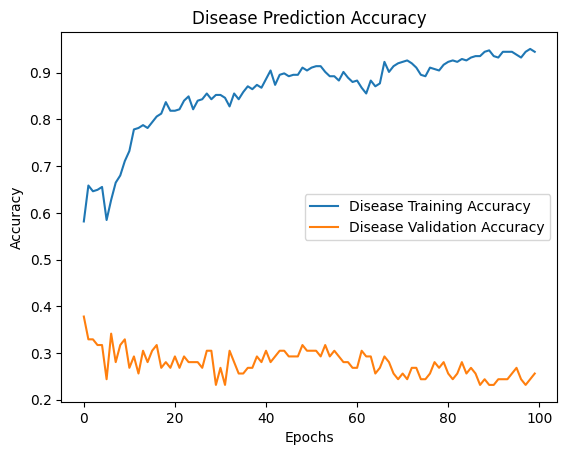

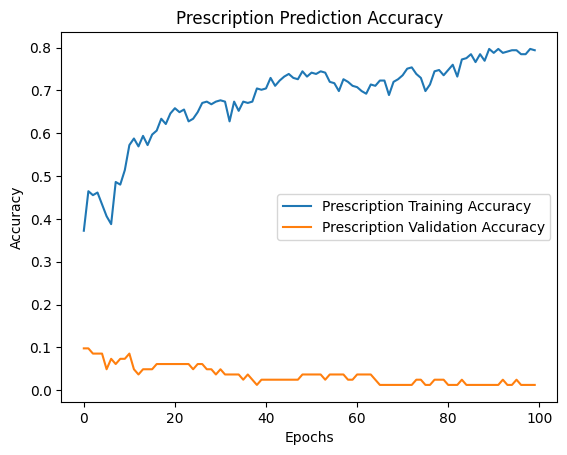

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy for disease prediction
plt.plot(history.history['disease_output_accuracy'], label='Disease Training Accuracy')
plt.plot(history.history['val_disease_output_accuracy'], label='Disease Validation Accuracy')
plt.title('Disease Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot accuracy for prescription prediction
plt.plot(history.history['prescription_output_accuracy'], label='Prescription Training Accuracy')
plt.plot(history.history['val_prescription_output_accuracy'], label='Prescription Validation Accuracy')
plt.title('Prescription Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
